In [61]:
import PIL.Image,PIL.ImageDraw,PIL.ImageFont
import matplotlib.pyplot as plt
import numpy as np
import string

font=PIL.ImageFont.truetype("Bangla.ttf", size=64)

    
class GraphemeParser(object):
    '''
    @author: Tahsin Reasat
    Adoptation:MD. Nazmuddoha Ansary
    '''
    def __init__(self):
        self.vds    =['া', 'ি', 'ী', 'ু', 'ূ', 'ৃ', 'ে', 'ৈ', 'ো', 'ৌ']
        self.cds    =['ঁ', 'র্', 'র্য', '্য', '্র', '্র্য', 'র্্র']
        self.roots  =['ং','ঃ','অ','আ','ই','ঈ','উ','ঊ','ঋ','এ','ঐ','ও','ঔ','ক','ক্ক','ক্ট','ক্ত','ক্ল','ক্ষ','ক্ষ্ণ',
                    'ক্ষ্ম','ক্স','খ','গ','গ্ধ','গ্ন','গ্ব','গ্ম','গ্ল','ঘ','ঘ্ন','ঙ','ঙ্ক','ঙ্ক্ত','ঙ্ক্ষ','ঙ্খ','ঙ্গ','ঙ্ঘ','চ','চ্চ',
                    'চ্ছ','চ্ছ্ব','ছ','জ','জ্জ','জ্জ্ব','জ্ঞ','জ্ব','ঝ','ঞ','ঞ্চ','ঞ্ছ','ঞ্জ','ট','ট্ট','ঠ','ড','ড্ড','ঢ','ণ',
                    'ণ্ট','ণ্ঠ','ণ্ড','ণ্ণ','ত','ত্ত','ত্ত্ব','ত্থ','ত্ন','ত্ব','ত্ম','থ','দ','দ্ঘ','দ্দ','দ্ধ','দ্ব','দ্ভ','দ্ম','ধ',
                    'ধ্ব','ন','ন্জ','ন্ট','ন্ঠ','ন্ড','ন্ত','ন্ত্ব','ন্থ','ন্দ','ন্দ্ব','ন্ধ','ন্ন','ন্ব','ন্ম','ন্স','প','প্ট','প্ত','প্ন',
                    'প্প','প্ল','প্স','ফ','ফ্ট','ফ্ফ','ফ্ল','ব','ব্জ','ব্দ','ব্ধ','ব্ব','ব্ল','ভ','ভ্ল','ম','ম্ন','ম্প','ম্ব','ম্ভ',
                    'ম্ম','ম্ল','য','র','ল','ল্ক','ল্গ','ল্ট','ল্ড','ল্প','ল্ব','ল্ম','ল্ল','শ','শ্চ','শ্ন','শ্ব','শ্ম','শ্ল','ষ',
                    'ষ্ক','ষ্ট','ষ্ঠ','ষ্ণ','ষ্প','ষ্ফ','ষ্ম','স','স্ক','স্ট','স্ত','স্থ','স্ন','স্প','স্ফ','স্ব','স্ম','স্ল','স্স','হ',
                    'হ্ন','হ্ব','হ্ম','হ্ল','ৎ','ড়','ঢ়','য়']

        self.punctuations           =   ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+',
                                        ',', '-', '.', '/', ':', ':-', ';', '<', '=', '>', '?', 
                                        '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '।', '—', '’', '√']

        self.numbers                =    ['০','১','২','৩','৪','৫','৬','৭','৮','৯']
        self.engraphemes =  list(string.ascii_lowercase)
        self.ennumbers   =  [str(i) for i in range(10)]
        
        self.ignore                 =   self.punctuations+self.numbers+self.engraphemes+self.ennumbers+[" "]


    def word2grapheme(self,word):
        graphemes = []
        grapheme = ''
        i = 0
        while i < len(word):
            if word[i] in self.ignore:
                graphemes.append(word[i])
            else:
                grapheme += (word[i])
                # print(word[i], grapheme, graphemes)
                # deciding if the grapheme has ended
                if word[i] in ['\u200d', '্']:
                    # these denote the grapheme is contnuing
                    pass
                elif word[i] == 'ঁ':  
                    # 'ঁ' always stays at the end
                    graphemes.append(grapheme)
                    grapheme = ''
                elif word[i] in list(self.roots) + ['়']:
                    # root is generally followed by the diacritics
                    # if there are trailing diacritics, don't end it
                    if i + 1 == len(word):
                        graphemes.append(grapheme)
                    elif word[i + 1] not in ['্', '\u200d', 'ঁ', '়'] + list(self.vds):
                        # if there are no trailing diacritics end it
                        graphemes.append(grapheme)
                        grapheme = ''

                elif word[i] in self.vds:
                    # if the current character is a vowel diacritic
                    # end it if there's no trailing 'ঁ' + diacritics
                    # Note: vowel diacritics are always placed after consonants
                    if i + 1 == len(word):
                        graphemes.append(grapheme)
                    elif word[i + 1] not in ['ঁ'] + list(self.vds):
                        graphemes.append(grapheme)
                        grapheme = ''

            i = i + 1
            # Note: df_cd's are constructed by df_root + '্'
            # so, df_cd is not used in the code

        return graphemes
    
def gaussian_heatmap(size=512, distanceRatio=2):
    '''
        creates a gaussian heatmap
        This is a fixed operation to create heatmaps
    '''
    # distrivute values
    v = np.abs(np.linspace(-size / 2, size / 2, num=size))
    # create a value mesh grid
    x, y = np.meshgrid(v, v)
    # spreading heatmap
    g = np.sqrt(x**2 + y**2)
    g *= distanceRatio / (size / 2)
    g = np.exp(-(1 / 2) * (g**2))
    g *= 255
    return g.clip(0, 255).astype('uint8')
heatmap=gaussian_heatmap(size=128,distanceRatio=3)
heatword=gaussian_heatmap(size=128,distanceRatio=2)
GP=GraphemeParser()

In [63]:
import cv2
def get_img_and_map(text,font):
    '''
        @function author
        needed outputs:
            img: font image
            map: heapmat
    '''
    # draw
    image = PIL.Image.new(mode='L', size=font.getsize(text))
    draw = PIL.ImageDraw.Draw(image)
    draw.text(xy=(0, 0), text=text, fill=1, font=font)
    img= np.array(image)
    img_h,img_w=img.shape
    # heatmap per component
    words=text.split()
    curr_width=0
    char_maps=[]
    word_maps=[]
    for idx,word in enumerate(words):
        width,_=font.getsize(word)
        if idx==0:
            curr_width+=width
        else:
            space_width,_=font.getsize(word+' ')
            curr_width+=space_width
            
        comps=GP.word2grapheme(word)
        word_map=cv2.resize(heatword,(width,img_h),fx=0,fy=0, interpolation = cv2.INTER_NEAREST)
        char_map=np.concatenate([heatmap for _ in comps],axis=1)
        char_map=cv2.resize(char_map,(width,img_h),fx=0,fy=0, interpolation = cv2.INTER_NEAREST)
        
        if idx>0:
            spad=np.zeros((img_h,curr_width-width))
            char_map=np.concatenate([spad,char_map],axis=1)
            word_map=np.concatenate([spad,word_map],axis=1)
        
        char_maps.append(char_map)
        word_maps.append(word_map)
        
    _,cm_w=char_map.shape
    for idx,char_map in enumerate(char_maps[:-1]):
        pad=np.zeros((img_h,cm_w-char_map.shape[1]))
        char_map=np.concatenate([char_map,pad],axis=1)
        char_maps[idx]=char_map
        word_map=np.concatenate([word_maps[idx],pad],axis=1)
        word_maps[idx]=word_map
        
    char_map=sum(char_maps)
    word_map=sum(word_maps)
    return img,char_map,word_map



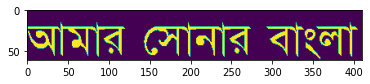

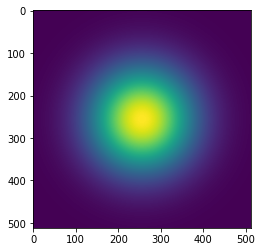

In [4]:
plt.imshow(heatmap)